### Using DataLoader

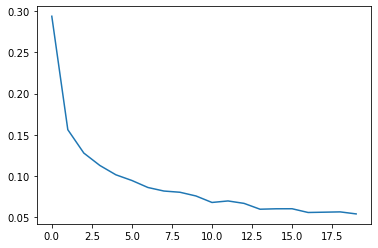

In [227]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class NeuralNetwork(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hidden=32):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(num_inputs, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_outputs)
        )

    def forward(self, x):
        x = x.squeeze()
        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        return out

# Transform the data to torch tensors and normalize it
transform = transforms.Compose([transforms.ToTensor()])

# Load the training data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load the test data
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

learning_rate = 0.005
batch_size = 64
num_epochs = 20
num_inputs = 28*28
num_outputs = 10
num_hidden = 32

# Use a data loader to handle batching of the data
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

neural_network = NeuralNetwork(num_inputs, num_outputs, num_hidden=num_hidden)
optimizer = optim.Adam(neural_network.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

losses = []
for i in range(1, num_epochs+1):
    neural_network.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        y_hats = neural_network(images)
        loss = loss_function(y_hats, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.detach().item()
    average_loss = running_loss / len(train_loader)
    losses.append(average_loss)

plt.plot(losses)

In [228]:
with torch.no_grad():
    running_sum = 0
    for images, labels in test_loader:
        y_hats = neural_network(images)
        # print(y_hats.size())
        preds = torch.argmax(y_hats, dim=1)
        running_sum += torch.sum(preds == labels)
    print(running_sum / len(test_data))

tensor(0.9656)
